# HomeWork 0

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Draw a sine wave
- [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace)
- [np.random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html#numpy.random.normal)

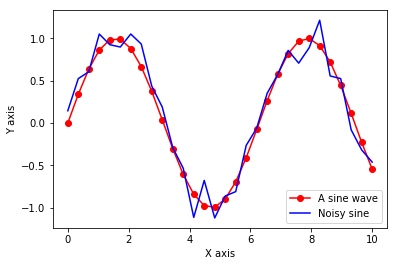

In [16]:
# 从0到10等分成30个点，生成一个ndarray
x = np.linspace(0,10,30)
y = np.sin(x)
z = y + np.random.normal(size=30) * 0.2
# label和legend搭配使用，显示图例铭文
plt.plot(x, y, 'ro-', label='A sine wave') # 'ro-'红色实心圈实线
plt.plot(x, z, 'b-', label='Noisy sine') # 'b-'蓝色实线
plt.legend(loc=4) 
plt.xlabel('X axis')
plt.ylabel('Y axis');

### Hello Numpy

#### Make a 3 row x 4 column array of random numbers
- [np.random.random](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random.html#numpy.random.random)

In [18]:
# np.random.random返回[0.0,1.0)之间的浮点数
x = np.random.random((3,4))
x

array([[ 0.32821882,  0.31435691,  0.0414239 ,  0.2602664 ],
       [ 0.72026436,  0.81103659,  0.86618143,  0.96090844],
       [ 0.933008  ,  0.45668742,  0.96887441,  0.11540558]])

#### Add 1 to every element

In [29]:
x = x + 1
x

array([[ 1.32821882,  1.31435691,  1.0414239 ,  1.2602664 ],
       [ 1.72026436,  1.81103659,  1.86618143,  1.96090844],
       [ 1.933008  ,  1.45668742,  1.96887441,  1.11540558]])

#### Get the element at row 1, column 2

In [30]:
x[0, 1]

1.3143569085462388

#### Get the first row

In [31]:
x[0, :]

array([ 1.32821882,  1.31435691,  1.0414239 ,  1.2602664 ])

#### Get every 2nd column of the first row

In [32]:
x[0, ::2]

array([ 1.32821882,  1.0414239 ])

#### Print the maximum, minimum, and mean of the array

In [37]:
print('Max:', x.max())
print('Min:', x.min())
print('Mean:', x.mean())

Max: 1.96887441269
Min: 1.04142389934
Mean: 1.56471935581


#### Call the x.max function again, but use the axis keyword to print the maximum of each row in x.

In [38]:
print(x.max(axis=1))

[ 1.32821882  1.96090844  1.96887441]


### Simulate 500 coin "fair" coin tosses
- [np.random.binomial](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html#numpy.random.binomial)

In [43]:
x = np.random.binomial(500, 0.5)
print(f'number of heads: {x}')

number of heads: 246


#### Repeat this simulation 500 times, and use the plt.hist() function to plot a histogram of the number of Heads (1s) in each simulation

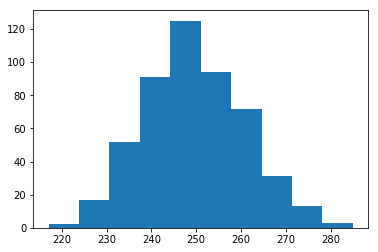

In [47]:
heads = np.random.binomial(500, 0.5, size=500)
plt.hist(heads, bins=10);

In [48]:
heads.shape

(500,)

### The Monty Hall Problem
Here's a fun and perhaps surprising statistical riddle, and a good way to get some practice writing python functions

In a gameshow, contestants try to guess which of 3 closed doors contain a cash prize (goats are behind the other two doors). Of course, the odds of choosing the correct door are 1 in 3. As a twist, the host of the show occasionally opens a door after a contestant makes his or her choice. This door is always one of the two the contestant did not pick, and is also always one of the goat doors (note that it is always possible to do this, since there are two goat doors). At this point, the contestant has the option of keeping his or her original choice, or swtiching to the other unopened door. The question is: is there any benefit to switching doors? The answer surprises many people who haven't heard the question before.

We can answer the problem by running simulations in Python. We'll do it in several parts.

First, write a function called simulate_prizedoor. This function will simulate the location of the prize in many games -- see the detailed specification below:
- [np.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html#numpy.random.randint)

In [72]:
import random

def pick_door():
    # 随机返回1，2，3中的一个
    return random.randint(1,3)


class MontyHall:
    def __init__(self):
        self.prize_door = pick_door()
        self.selected_door = None
        self.removed_door = None
    
    def select_door(self):
        self.selected_door = pick_door()
        
    def remove_door(self):
        d = pick_door()
        while d == self.selected_door or d == self.prize_door:
            d = pick_door()
        self.removed_door = d
        
    def switch_choice(self):
        self.selected_door = 6 - self.selected_door - self.removed_door
        
    def user_wins(self):
        if self.selected_door == self.prize_door:
            return True
        else:
            return False
        
    def run_game(self, switch=True):
        self.select_door()
        self.remove_door()
        if switch:
            self.switch_choice()
        return self.user_wins()
    

def play(nsim, switch):    
    
    wins, losses = 0, 0
    for i in range(nsim):
        m = MontyHall()
        if m.run_game(switch=switch):
            wins += 1
        else:
            losses += 1

    perc_win = 100*wins/(wins+losses)

    print(f'One million Monty Hall games (switch={switch}):')
    print(f'won: {wins} games')
    print(f'lost: {losses} games')
    print('odds: {:.2f}% winning percentage'.format(perc_win))


In [69]:
play(1000000, True)

One million Monty Hall games (switch=True):
won: 666166 games
lost: 333834 games
odds: 66.62% winning percentage


In [70]:
play(1000000, False)

One million Monty Hall games (switch=False):
won: 333127 games
lost: 666873 games
odds: 33.31% winning percentage
